# <center> EXPLORATORY FACTOR ANALYSIS <center>

Exploratory factor analysis or EFA is a statistical technique used to reduce data to a smaller set 
of summary variables and to explore the underlying structure of a relatively large set of variables. 
It is used to identify the underlying relationships between measured variables. Each observed 
variable is considered as a potential measure of every factor, and the goal is to determine the 
strongest relationships

# QUESTION:
Factor analysis is a useful technique to find latent factors that can potentially describe multiple 
attributes, which is sometimes very useful for dimensionality reduction. Use the Airline 
Passenger Satisfaction dataset to perform factor analysis. (Use only the columns that 
represent the ratings given by the passengers, only 14 columns). Choose the best features 
possible that helps in dimensionality reduction, without much loss in information.
Airline Passenger Satisfaction datase

### Importing Libraries

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading and reading

In [57]:
df=pd.read_csv("/kaggle/input/airline-passenger-satisfaction/train.csv")

In [58]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [60]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [61]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [62]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

### Checking the satisfaction level

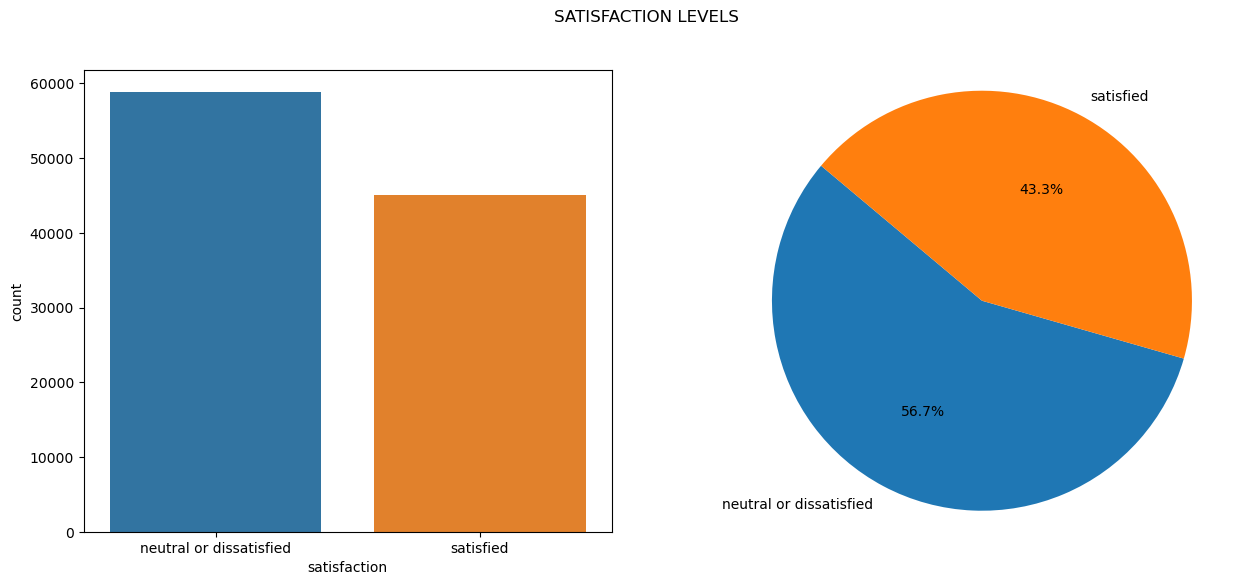

In [63]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
sns.countplot(data=df,x=df['satisfaction'],ax=ax1)
label=list(df['satisfaction'].value_counts().index)# making it as list
values=list(df['satisfaction'].value_counts().values)
# pie chart
ax2=plt.pie(values, labels=label, autopct='%1.1f%%', startangle=140)
ax2=plt.axis('equal')
fig.suptitle("SATISFACTION LEVELS")
plt.show()

### Gender, Customer Type, Class, Type of Travel are univariate type so we are using the same chart 

### Gender

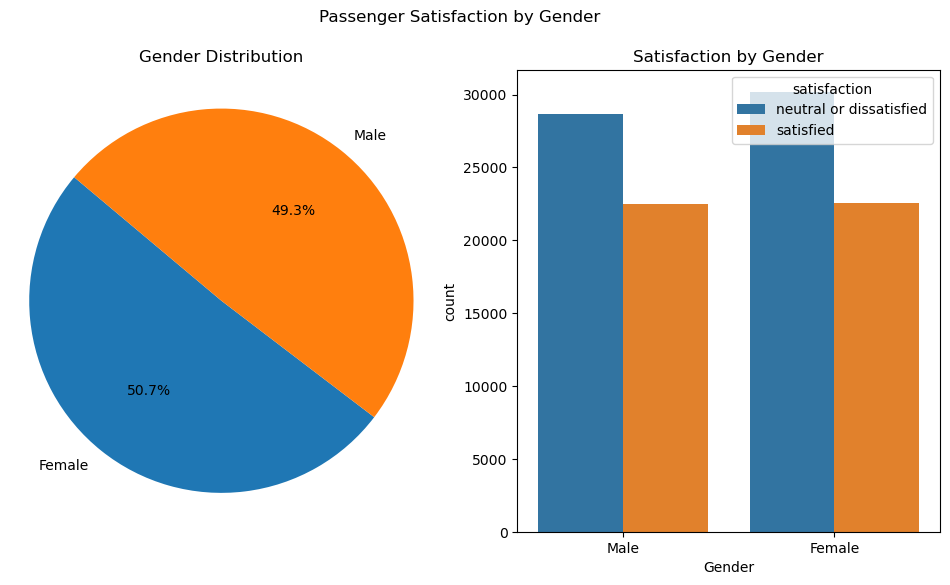

In [64]:
# Getting the count of genders and making them into lists
label = list(df['Gender'].value_counts().index)
values = list(df['Gender'].value_counts().values)

# Creating the pie chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the pie chart on the first subplot (ax1)
ax1.pie(values, labels=label, autopct='%1.1f%%', startangle=140)
ax1.axis('equal')
ax1.set_title('Gender Distribution')

# Creating the count plot
sns.countplot(x='Gender', hue='satisfaction', data=df, ax=ax2)
ax2.set_title('Satisfaction by Gender')
fig.suptitle("Passenger Satisfaction by Gender")
plt.show()

### Customer type

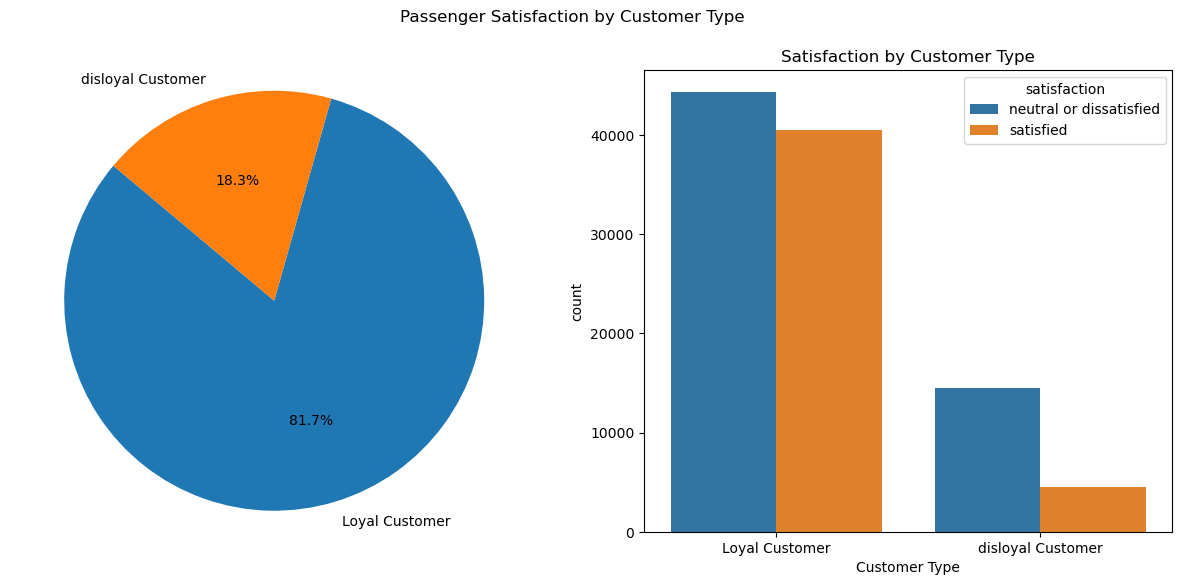

In [65]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
label=list(df['Customer Type'].value_counts().index)# making it as list
values=list(df['Customer Type'].value_counts().values)
# pie chart

ax1.pie(values, labels=label, autopct='%1.1f%%', startangle=140)
ax1.axis('equal')

sns.countplot(x='Customer Type', hue='satisfaction', data=df, ax=ax2)
ax2.set_title('Satisfaction by Customer Type')
fig.suptitle("Passenger Satisfaction by Customer Type")
plt.show()

### Class

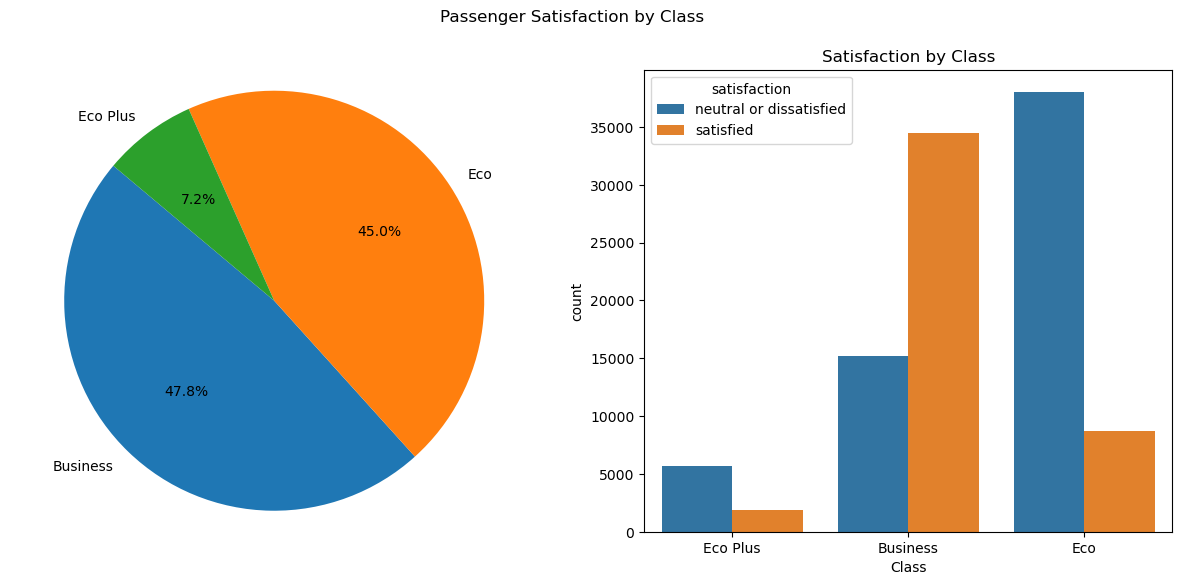

In [66]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
label=list(df['Class'].value_counts().index)# making it as list
values=list(df['Class'].value_counts().values)
# pie chart

ax1.pie(values, labels=label, autopct='%1.1f%%', startangle=140)
ax1.axis('equal')

sns.countplot(x='Class', hue='satisfaction', data=df, ax=ax2)
ax2.set_title('Satisfaction by Class')
fig.suptitle("Passenger Satisfaction by Class")
plt.show()

### Type of Travel

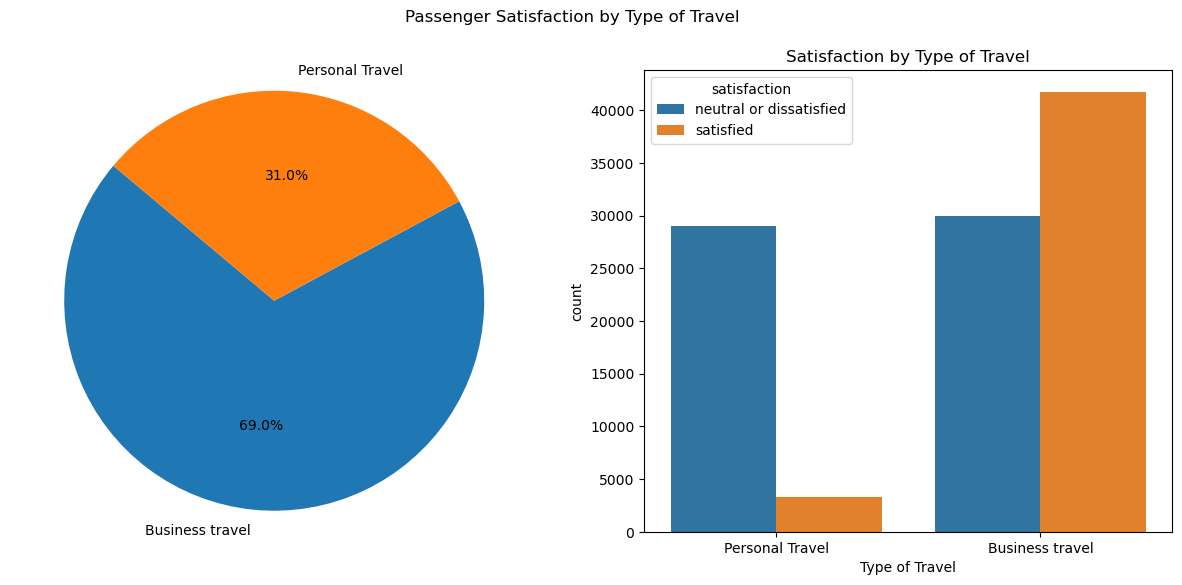

In [67]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
label=list(df['Type of Travel'].value_counts().index)# making it as list
values=list(df['Type of Travel'].value_counts().values)
# pie chart

ax1.pie(values, labels=label, autopct='%1.1f%%', startangle=140)
ax1.axis('equal')

sns.countplot(x='Type of Travel', hue='satisfaction', data=df, ax=ax2)
ax2.set_title('Satisfaction by Type of Travel')
fig.suptitle("Passenger Satisfaction by Type of Travel")
plt.show()


### Age: this has real values so we are using KD plot

<Axes: xlabel='Age', ylabel='Density'>

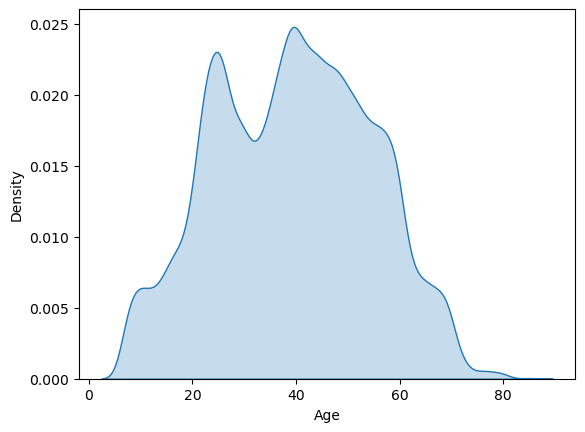

In [68]:
sns.kdeplot(df['Age'],fill=True)

### Visualize Ordinal Data

In [69]:
# Leaving 'Unnamed: 0', 'id', 'Gender'
num_var=df.select_dtypes(include=['int']).columns[3:]
num_var

Index(['Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes'],
      dtype='object')

In [70]:
df['Ease of Online booking'].value_counts()

3    24449
2    24021
4    19571
1    17525
5    13851
0     4487
Name: Ease of Online booking, dtype: int64

#### Creating a dictionary for the above

In [71]:
ordinal_dict={5:'Excellent',
             4:'Very Good',
             3:'Good',
             2:'Bad',
             1:'Very Bad',
             0:'Not Reported'}
df['Ease of Online booking']=df['Ease of Online booking'].map(ordinal_dict)

In [72]:
df['Ease of Online booking'].value_counts()

Good            24449
Bad             24021
Very Good       19571
Very Bad        17525
Excellent       13851
Not Reported     4487
Name: Ease of Online booking, dtype: int64

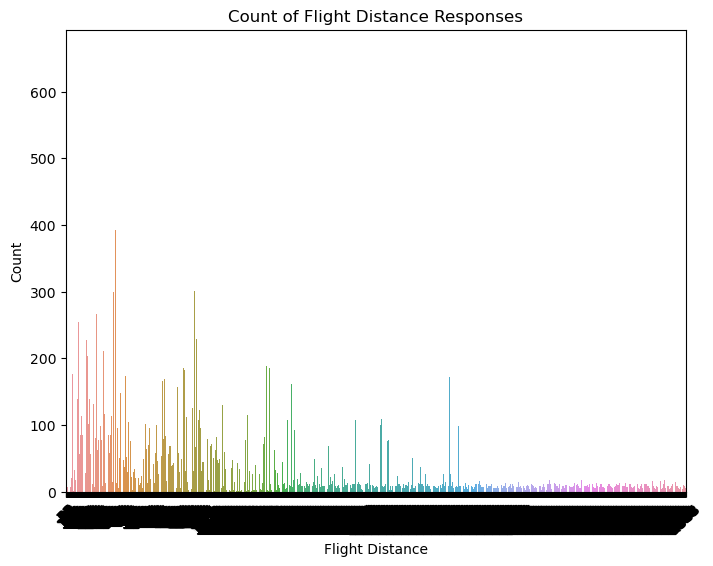

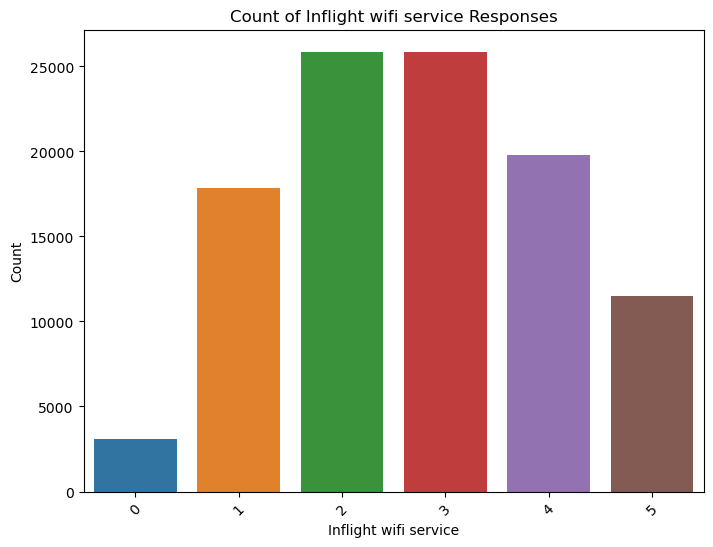

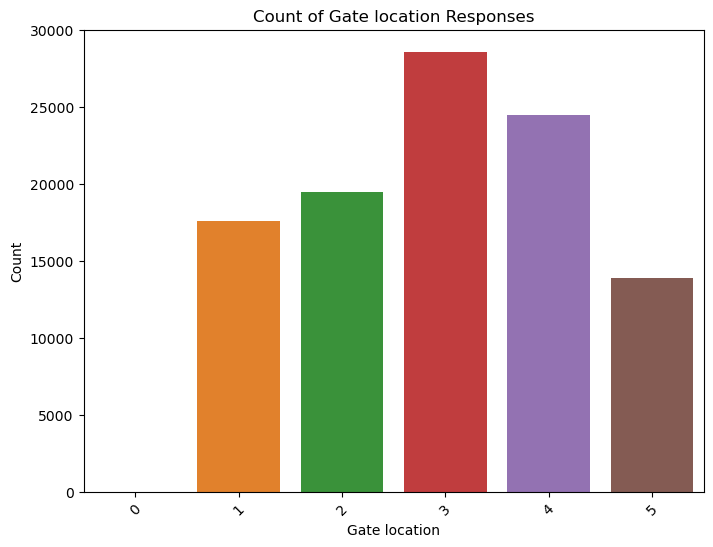

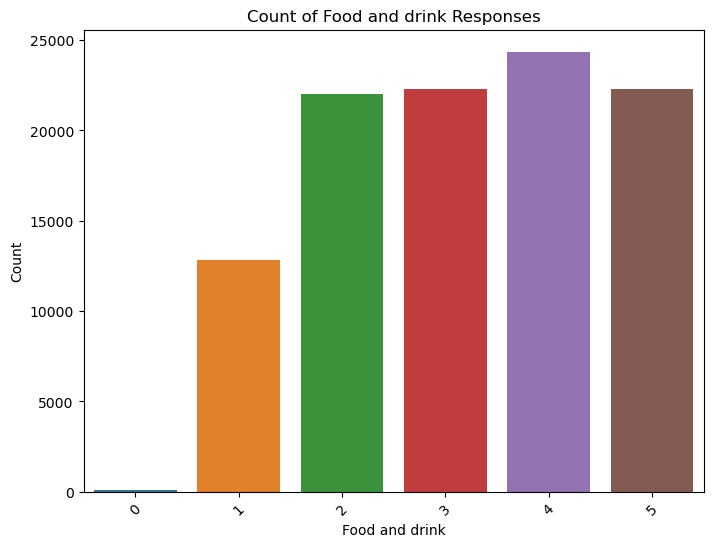

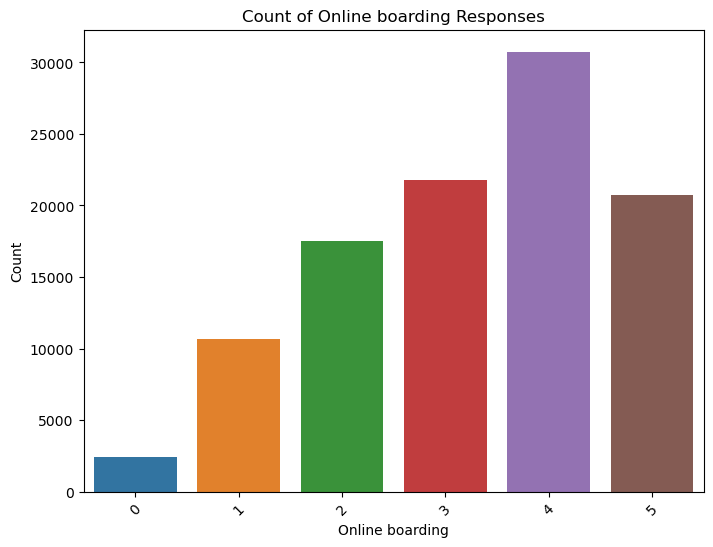

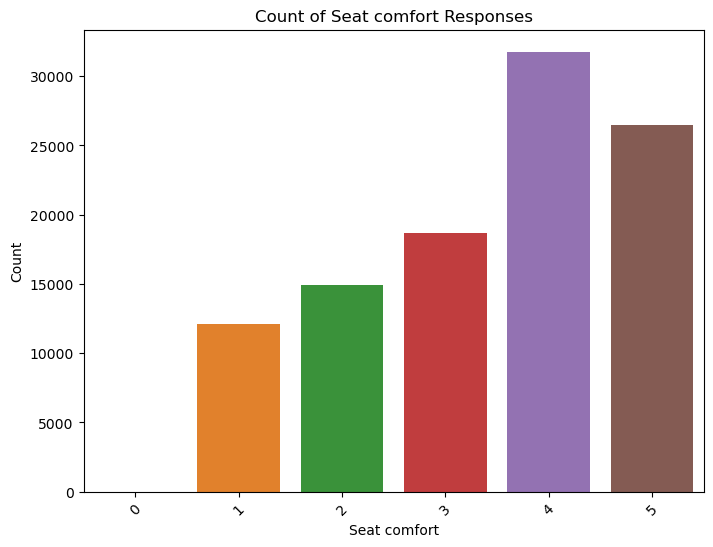

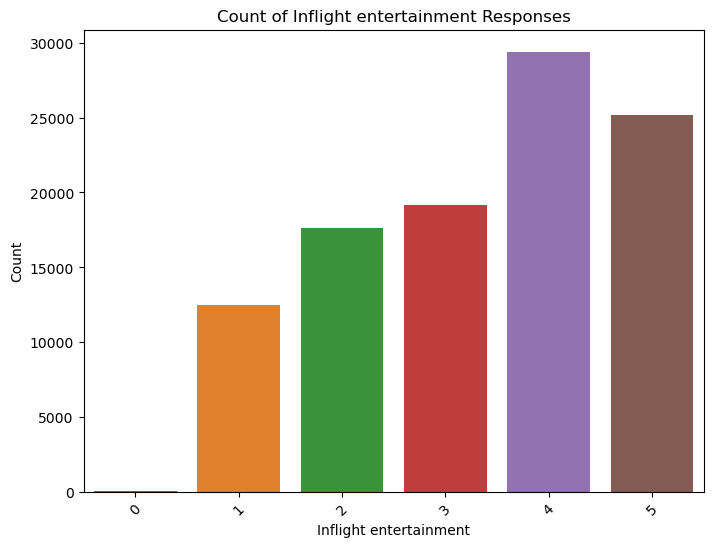

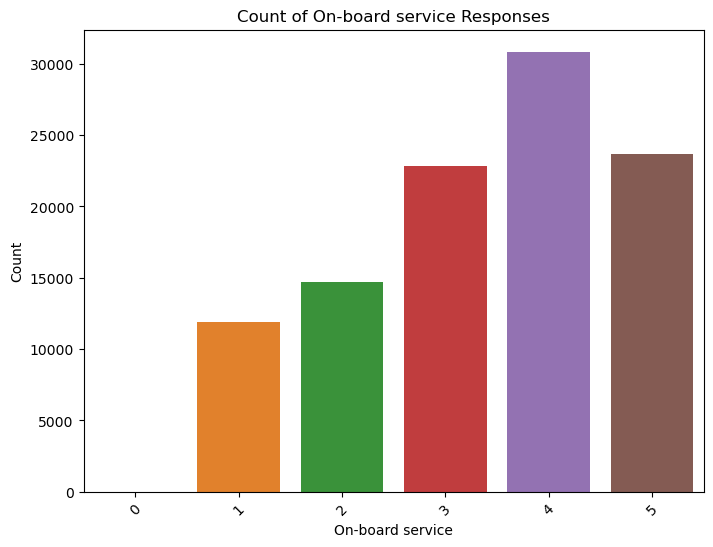

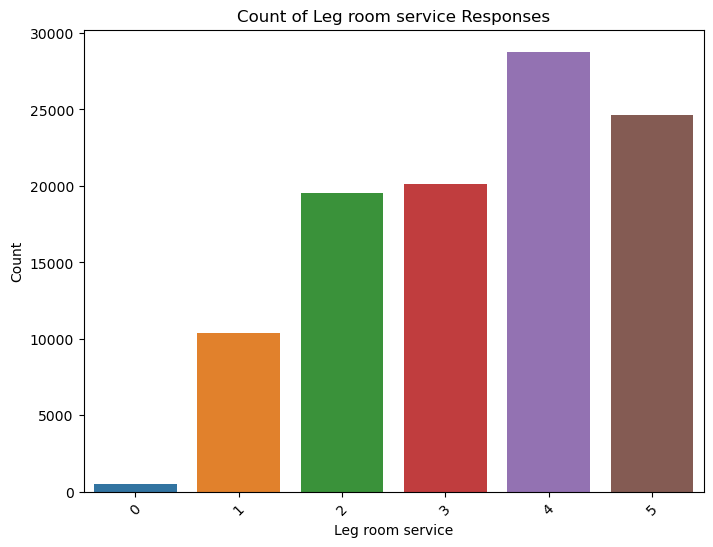

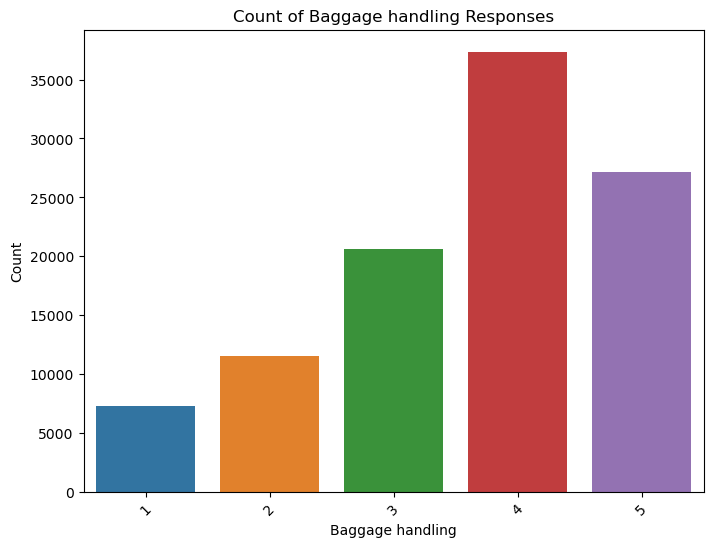

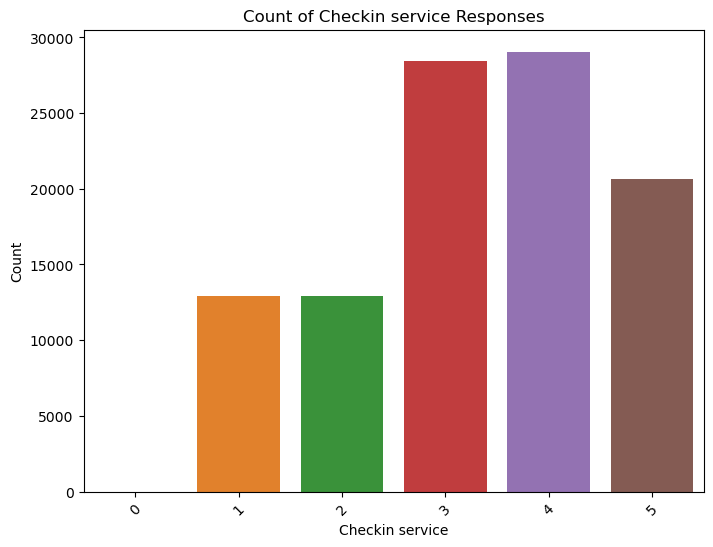

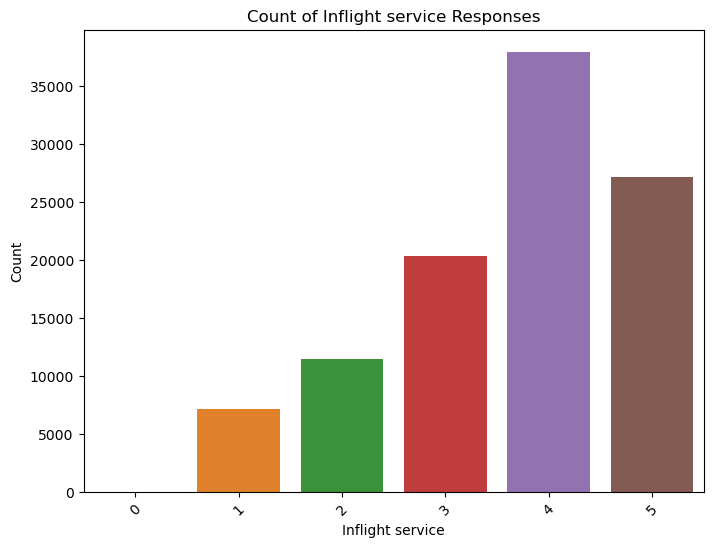

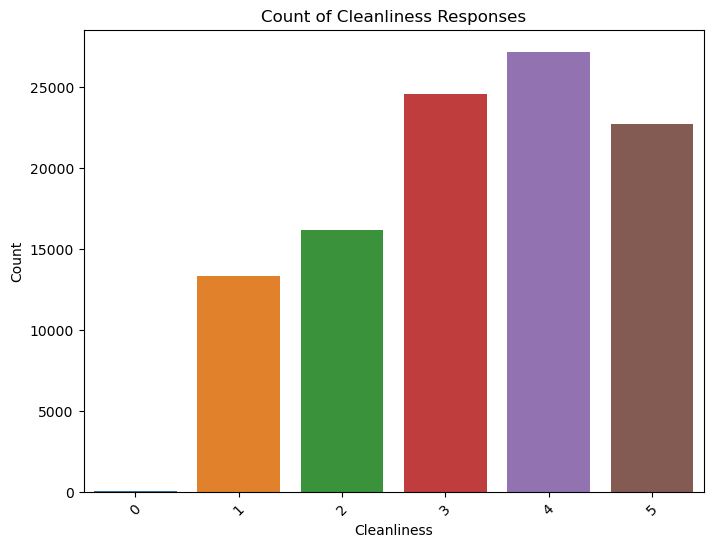

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def create_bar_plot(df, column_list):
    for col in column_list:
        value_counts = df[col].value_counts()

        # Create a bar plot
        plt.figure(figsize=(8, 6))
        sns.barplot(x=value_counts.index, y=value_counts.values)
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.title(f'Count of {col} Responses')
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.show()

# List of columns for which you want to create bar plots
column_list = ['Flight Distance', 'Inflight wifi service', 'Gate location', 'Food and drink', 
               'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 
               'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 
               'Cleanliness']

# Call the function to create bar plots for the specified columns
create_bar_plot(df, column_list)


### Outlier Detection Techniques

In [74]:
['Flight Distance','Arrival Delay in Minutes','Departure Delay in Minutes']

['Flight Distance', 'Arrival Delay in Minutes', 'Departure Delay in Minutes']

In [75]:
np.percentile(df['Flight Distance'],25)
np.percentile(df['Flight Distance'],75)
iqr=np.percentile(df['Flight Distance'],75)-np.percentile(df['Flight Distance'],25)
lower_bound=np.percentile(df['Flight Distance'],25)-(1.5*iqr)
upper_bound=np.percentile(df['Flight Distance'],75)-(1.5*iqr)
print(lower_bound,upper_bound)

-1579.5 -250.5


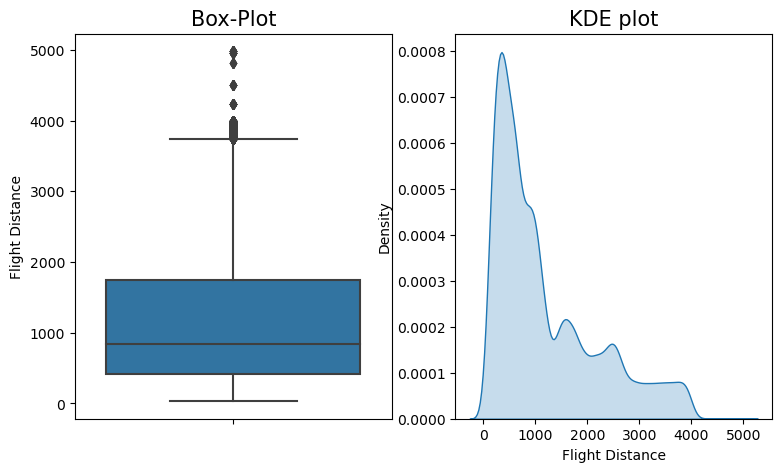

In [76]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,5))

# Plotting the Box Plot on the first subplot (ax1)
ax1.set_title('Box-Plot', fontsize=15)
sns.boxplot(y='Flight Distance', data=df, ax=ax1)

# Plotting the KDE plot on the second subplot (ax2)
ax2.set_title('KDE plot', fontsize=15)
sns.kdeplot(df['Flight Distance'], fill=True, ax=ax2)

plt.show()

In [77]:
def percentile(data, col, start, end, jump):
    var = data[col].values
    var = np.sort(var, axis=None)
    max_idx = len(var) - 1

    for i in range(start, end + jump, jump):
        percentile_idx = int(max_idx * (float(i) / 100))
        print('{} percentile value is {}'.format(i, var[percentile_idx]))
    print("100 percentile value is", var[-1])

# Example usage
percentile(df, 'Flight Distance', 0, 100, 10)

0 percentile value is 31
10 percentile value is 236
20 percentile value is 358
30 percentile value is 482
40 percentile value is 630
50 percentile value is 843
60 percentile value is 1050
70 percentile value is 1513
80 percentile value is 2065
90 percentile value is 2750
100 percentile value is 4983
100 percentile value is 4983


In [78]:
percentile(df, 'Flight Distance', 90, 100, 1)


90 percentile value is 2750
91 percentile value is 2871
92 percentile value is 2994
93 percentile value is 3129
94 percentile value is 3255
95 percentile value is 3383
96 percentile value is 3510
97 percentile value is 3635
98 percentile value is 3762
99 percentile value is 3882
100 percentile value is 4983
100 percentile value is 4983


In [79]:
percentile(df, 'Flight Distance', 90, 100, 1)

90 percentile value is 2750
91 percentile value is 2871
92 percentile value is 2994
93 percentile value is 3129
94 percentile value is 3255
95 percentile value is 3383
96 percentile value is 3510
97 percentile value is 3635
98 percentile value is 3762
99 percentile value is 3882
100 percentile value is 4983
100 percentile value is 4983


In [80]:
def percentile_third_view(data, col):
    var = data[col].values
    var = np.sort(var, axis=None)
    max_idx = len(var) - 1

    for i in np.arange(0.0,1.0,0.1):
        percentile_idx = int(max_idx * (float(99+i) / 100))
        print('{} percentile value is {}'.format(99+i, var[percentile_idx]))
    print("100 percentile value is", var[-1])

# Example usage
percentile_third_view(df, 'Flight Distance')

99.0 percentile value is 3882
99.1 percentile value is 3893
99.2 percentile value is 3905
99.3 percentile value is 3919
99.4 percentile value is 3930
99.5 percentile value is 3943
99.6 percentile value is 3955
99.7 percentile value is 3968
99.8 percentile value is 3982
99.9 percentile value is 3995
100 percentile value is 4983


In [81]:
# To remove the outliers from this column we can select a flight distance less than 3995
df[df['Flight Distance']<3995]

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


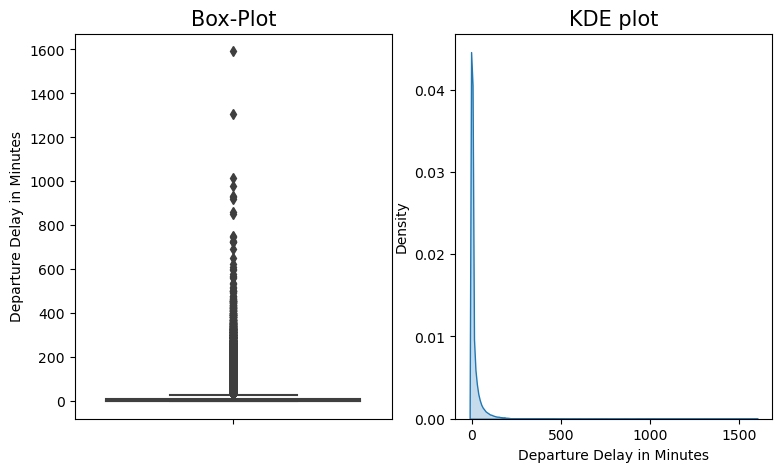

In [82]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,5))

# Plotting the Box Plot on the first subplot (ax1)
ax1.set_title('Box-Plot', fontsize=15)
sns.boxplot(y='Departure Delay in Minutes', data=df, ax=ax1)

# Plotting the KDE plot on the second subplot (ax2)
ax2.set_title('KDE plot', fontsize=15)
sns.kdeplot(df['Departure Delay in Minutes'], fill=True, ax=ax2)

plt.show()

In [83]:
percentile(df, 'Departure Delay in Minutes',0,100,10)

0 percentile value is 0
10 percentile value is 0
20 percentile value is 0
30 percentile value is 0
40 percentile value is 0
50 percentile value is 0
60 percentile value is 2
70 percentile value is 8
80 percentile value is 19
90 percentile value is 44
100 percentile value is 1592
100 percentile value is 1592


In [84]:
percentile(df, 'Departure Delay in Minutes',90,100,1)


90 percentile value is 44
91 percentile value is 48
92 percentile value is 54
93 percentile value is 60
94 percentile value is 68
95 percentile value is 78
96 percentile value is 91
97 percentile value is 108
98 percentile value is 134
99 percentile value is 181
100 percentile value is 1592
100 percentile value is 1592


In [85]:
percentile_third_view(df,'Departure Delay in Minutes')

99.0 percentile value is 181
99.1 percentile value is 187
99.2 percentile value is 195
99.3 percentile value is 204
99.4 percentile value is 215
99.5 percentile value is 233
99.6 percentile value is 253
99.7 percentile value is 278
99.8 percentile value is 315
99.9 percentile value is 373
100 percentile value is 1592


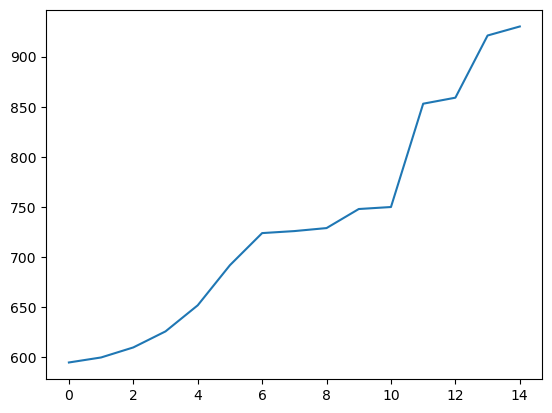

In [86]:
var=df['Departure Delay in Minutes'].values
var=np.sort(var,axis=None)
plt.plot(var[-20:-5])
plt.show()

In [87]:
# to remove outlier from departure delaytime, flight which delay less than 750 minutes
df[df['Departure Delay in Minutes']<750]

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


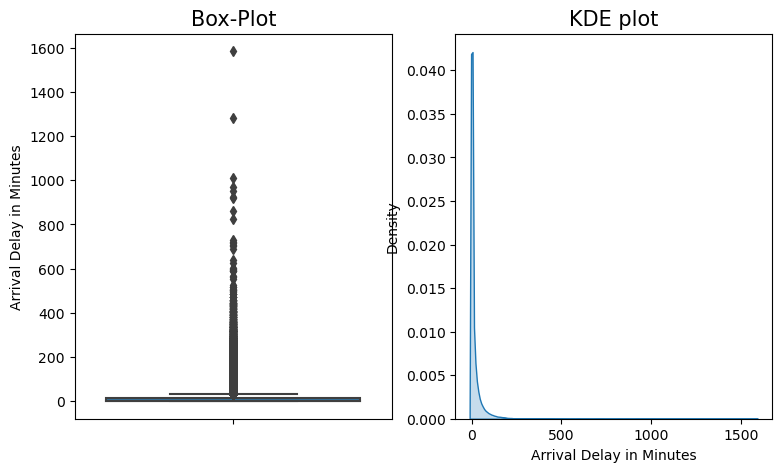

In [88]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,5))

# Plotting the Box Plot on the first subplot (ax1)
ax1.set_title('Box-Plot', fontsize=15)
sns.boxplot(y='Arrival Delay in Minutes', data=df, ax=ax1)

# Plotting the KDE plot on the second subplot (ax2)
ax2.set_title('KDE plot', fontsize=15)
sns.kdeplot(df['Arrival Delay in Minutes'], fill=True, ax=ax2)

plt.show()

In [89]:
percentile(df, 'Arrival Delay in Minutes',80,90,1)

80 percentile value is 20.0
81 percentile value is 21.0
82 percentile value is 23.0
83 percentile value is 25.0
84 percentile value is 27.0
85 percentile value is 29.0
86 percentile value is 32.0
87 percentile value is 35.0
88 percentile value is 38.0
89 percentile value is 41.0
90 percentile value is 45.0
100 percentile value is nan


In [90]:
percentile(df, 'Arrival Delay in Minutes',0,100,10)

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 0.0
60 percentile value is 2.0
70 percentile value is 9.0
80 percentile value is 20.0
90 percentile value is 45.0
100 percentile value is nan
100 percentile value is nan


In [91]:
percentile_third_view(df, 'Arrival Delay in Minutes')

99.0 percentile value is 208.0
99.1 percentile value is 221.0
99.2 percentile value is 238.0
99.3 percentile value is 256.0
99.4 percentile value is 283.0
99.5 percentile value is 318.0
99.6 percentile value is 381.0
99.7 percentile value is 1011.0
99.8 percentile value is nan
99.9 percentile value is nan
100 percentile value is nan


In [92]:
# considering data which have arrival delay time less than 1000 mins
df[df['Arrival Delay in Minutes']<645]

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [93]:
def removal_outliers(data):
    a=data.shape[0]
    print("{} are the number of rows in the original dataframe".format(a))
    New_dataframe=data[(data['Flight Distance']<3995) & (data['Departure Delay in Minutes']<750) & (data['Arrival Delay in Minutes']<645)]
    b=New_dataframe.shape[0]
    print("Number of Outlier : ",(a-b))
    print("Percentage of data Removed :",100-(b/a)*100)
    return New_dataframe
new_df=removal_outliers(df)

103904 are the number of rows in the original dataframe
Number of Outlier :  430
Percentage of data Removed : 0.4138435478903517


In [94]:
df['Arrival Delay in Minutes'].isnull().sum()
df['Arrival Delay in Minutes'].fillna(value=df['Arrival Delay in Minutes'].median(),inplace=True)
df.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [95]:
new_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


### Correlation Analysis

In [96]:
target_dict={'neutral or dissatisfied':0,
            'satisfied':1}
new_df['satisfaction']=new_df['satisfaction'].map(target_dict)

/tmp/ipykernel_32/2266010948.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['satisfaction']=new_df['satisfaction'].map(target_dict)


/tmp/ipykernel_32/238663914.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  'satisfaction']].corr(),annot=True,cmap=cmap)


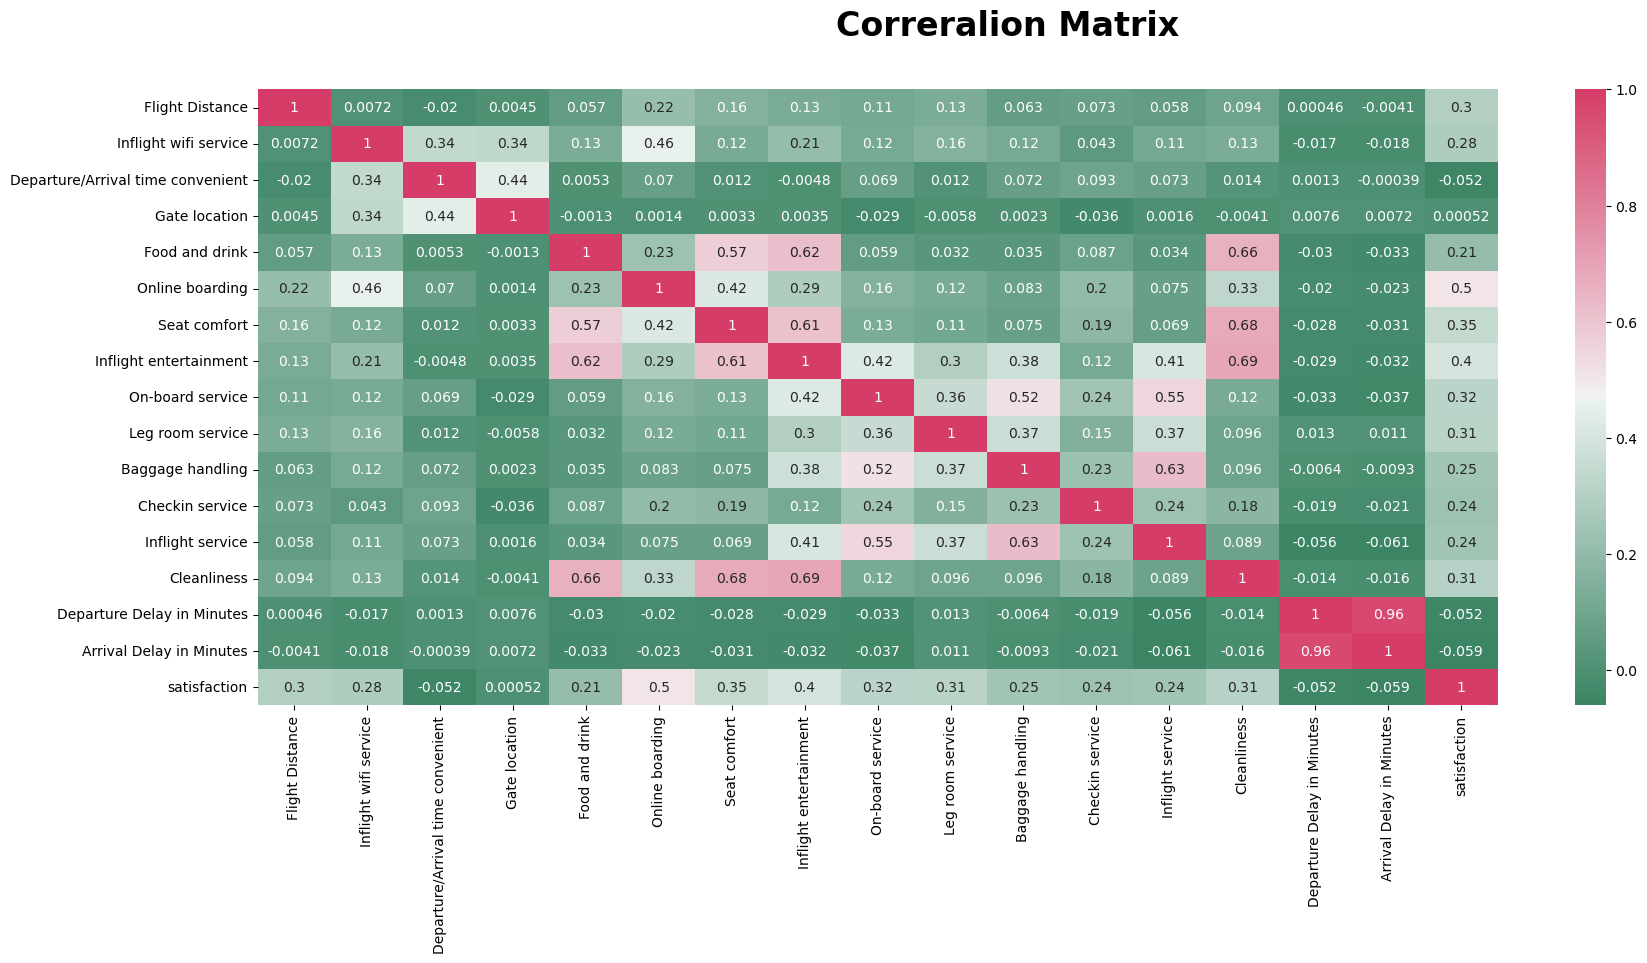

In [97]:
fig,plt.subplots(figsize=(20,8))
plt.suptitle('Correralion Matrix',fontsize=24,fontname='moonspace',weight='bold')
cmap=sns.diverging_palette(150,1,as_cmap=True)
sns.heatmap(new_df[['Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction']].corr(),annot=True,cmap=cmap)
plt.show()

In [98]:
from sklearn.preprocessing import LabelEncoder
label={}
for col in new_df.select_dtypes(include=['object']).columns:
    print(col)
    label[col]=LabelEncoder()
    new_df[col]=label[col].fit_transform(new_df[col])

Gender
Customer Type
Type of Travel
Class
Ease of Online booking


/tmp/ipykernel_32/59419694.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[col]=label[col].fit_transform(new_df[col])
/tmp/ipykernel_32/59419694.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[col]=label[col].fit_transform(new_df[col])
/tmp/ipykernel_32/59419694.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [99]:
new_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,1,0,13,1,2,460,3,4,...,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,1,1,25,0,0,235,3,2,...,1,1,5,3,1,4,1,1,6.0,0
2,2,110028,0,0,26,0,0,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,3,24026,0,0,25,0,0,562,2,5,...,2,2,5,3,1,4,2,11,9.0,0
4,4,119299,1,0,61,0,0,214,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [100]:
new_df=new_df.iloc[:,2:]

In [101]:
new_df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,2,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,0,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,1,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,2,3,...,3,3,4,4,3,3,3,0,0.0,1


### Splitting the data

In [102]:
from sklearn.model_selection import train_test_split
x=new_df.loc[:,:'Arrival Delay in Minutes']
y=new_df['satisfaction']

# Split the dataset

x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.3,random_state=42)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(72431, 22) (72431,)
(31043, 22) (31043,)


### Standadising the data

In [103]:
# Normalize features
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)


### Evaluation Metrics
- Accuracy
- Confusion Table
- f1
- Precision
- Recall
- Roc-auc
- log-loss

### Logistic Regression with hyper parameter Tuning

### Grid Search

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic_para = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'random_state': [0],
    'max_iter': list(range(100, 800, 100))
}

log = LogisticRegression()
# Applying Grid Search
grid = GridSearchCV(log, param_grid=logistic_para, cv=3, scoring='accuracy')
model_grid = grid.fit(x_train, y_train)

# grid search results
print("Best grid search hyperparameters are: " + str(model_grid.best_params_))
print("Best grid search score is: " + str(model_grid.best_score_))


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
147 fits failed out of a total of 294.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
147 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: So

Best grid search hyperparameters are: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'random_state': 0}
Best grid search score is: 0.8734796043859538


In [105]:
from sklearn.metrics import accuracy_score
y_pred=model_grid.predict(x_test)
print(y_pred.shape)
print(y_test.shape)

print('Check the accuracy of the model',accuracy_score(y_pred,y_test))

(31043,)
(31043,)
Check the accuracy of the model 0.8752697870695487


### Random Search

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

logistic_para = {
    'C': uniform(0.001, 1000),  # Uniform distribution between 0.001 and 1000
    'penalty': ['l1', 'l2'],
    'random_state': [0],
    'max_iter': list(range(100, 800, 100))
}

log = LogisticRegression()
# Applying Randomized Search
random_search = RandomizedSearchCV(log, param_distributions=logistic_para, n_iter=10, cv=3, scoring='accuracy', random_state=42)
model_random = random_search.fit(x_train, y_train)

# random search results
print("Best random search hyperparameters are: " + str(model_random.best_params_))
print("Best random search score is: " + str(model_random.best_score_))


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Best random search hyperparameters are: {'C': 58.084612168199456, 'max_iter': 500, 'penalty': 'l2', 'random_state': 0}
Best random search score is: 0.8731896732789967


(31043,)
(31043,)
Check the accuracy of the model: 87.53
Confusion Matrix:
[[15931  1666]
 [ 2206 11240]]


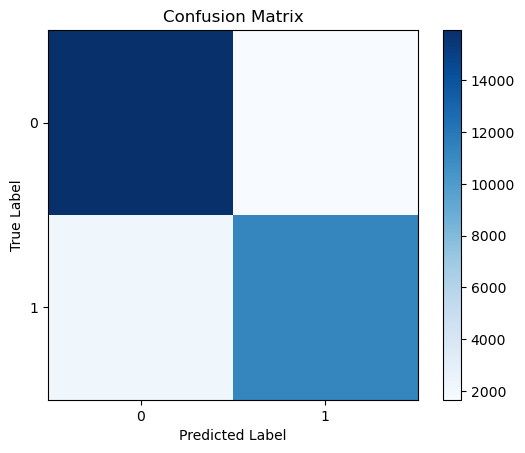

In [107]:

from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

y_pred = model_grid.predict(x_test)
print(y_pred.shape)
print(y_test.shape)

print('Check the accuracy of the model:', round(accuracy_score(y_pred, y_test) * 100, 2))

# Calculate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()

# Adding labels and ticks
tick_marks = range(len(set(y_test)))
plt.xticks(tick_marks, set(y_test))
plt.yticks(tick_marks, set(y_test))

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



In [109]:
dftrain = pd.read_csv('/kaggle/input/airline-passenger-satisfaction/train.csv')
dftest = pd.read_csv('/kaggle/input/airline-passenger-satisfaction/test.csv')
df_ori = pd.concat([dftrain, dftest], sort=False) # concatenate the train and test for generalizability
df = df_ori.copy()
df = df.iloc[:,8:24]
df = df.dropna() # checking missing data
df

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0
25972,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0
25973,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0
25974,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0


The above dataframe shows all the parameters that contribute to passengers' satisfaction.

# Importing Factor Analyzer
Let's install the package for factor analysis called Factor Analyzer.

In [112]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 2.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.8/202.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 kB 8.5 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42486 sha256=734ebf51b1cfb80849e4c8a1ceb869c87ee802cf9016115031f0052c6d1998a0
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor_analyzer


In [113]:
from factor_analyzer import FactorAnalyzer

# Testing a few Assumptions
- Bartlett's Test: to check whether observed variables intercorrelate at all using the observed correlation matrix
- Kaiser-Meyer-Olkin Test: to measures the suitability of data for factor analysis

In [115]:
# Barlett's

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
calculate_bartlett_sphericity(df)

(1100454.346363549, 0.0)

In [116]:
# KMO

from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df)
print(kmo_model)

0.7347314786302449


Both Bartlett's Test and KMO indicates that the dataframe is good to go for factor analysis.

# Identify the Number of Factors

In [118]:
# Instantiate the Factor Analyzer
fa= FactorAnalyzer()

# Fit the dataframe using Factor Analyzer
fa.fit(df)

# Identify the eigenvalues
ev,v=fa.get_eigenvalues()

# display the eigenvalues
ev

array([3.80389837, 2.3721328 , 2.16956004, 1.96182794, 1.06300589,
       0.94961228, 0.69607891, 0.53723377, 0.51374997, 0.46784182,
       0.36634408, 0.32884042, 0.29332142, 0.25443665, 0.18743275,
       0.03468288])

The above array of eigen values show that we can create five factors

In [120]:
# Then, we repeat the factor analyzer using five factors, fitting it, and print the factor loadings for each variables.
fa = FactorAnalyzer(5, rotation='varimax')
fa.fit(df)
print(fa.loadings_)

[[ 9.51222541e-02  1.34785546e-01 -9.00112249e-03  6.14101713e-01
   4.65372151e-01]
 [-9.57623208e-03  5.54625877e-02 -2.96640209e-04  5.89526396e-01
  -6.49139649e-03]
 [-3.22972072e-02  3.10800906e-02 -2.35280257e-03  7.72955081e-01
   4.48606165e-01]
 [ 1.25845037e-02 -4.67148475e-02  4.77284145e-03  6.82653009e-01
  -1.11332163e-01]
 [ 7.70829830e-01  4.10135173e-03 -1.80185151e-02  3.06650440e-02
   3.46802829e-02]
 [ 2.89549138e-01  1.22384914e-01 -9.53511003e-03  1.08246331e-01
   7.54004520e-01]
 [ 7.56387766e-01  7.95257132e-02 -1.38440023e-02 -2.64576503e-02
   2.09396961e-01]
 [ 7.67525556e-01  4.66055426e-01 -7.83337105e-03  4.09450711e-02
   2.32560649e-02]
 [ 8.52709958e-02  7.01341668e-01 -1.92813549e-02  1.03362676e-02
   4.71336120e-02]
 [ 5.78302900e-02  4.86147654e-01  2.34399006e-02  4.31284274e-02
   9.26339946e-02]
 [ 3.64249932e-02  7.64505666e-01  6.93860755e-03  4.62035704e-02
  -3.50870363e-02]
 [ 1.13416171e-01  2.87751430e-01 -1.30508044e-02 -2.70974658e-02

The above output is not human-eye friendly, so we make the below dataframes.

In [121]:
lmatrix=pd.DataFrame(fa.loadings_,index=list(df.columns),columns = ['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5'])
lmatrix

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
Inflight wifi service,0.095122,0.134786,-0.009001,0.614102,0.465372
Departure/Arrival time convenient,-0.009576,0.055463,-0.000297,0.589526,-0.006491
Ease of Online booking,-0.032297,0.031080,-0.002353,0.772955,0.448606
Gate location,0.012585,-0.046715,0.004773,0.682653,-0.111332
Food and drink,0.770830,0.004101,-0.018019,0.030665,0.034680
Online boarding,0.289549,0.122385,-0.009535,0.108246,0.754005
Seat comfort,0.756388,0.079526,-0.013844,-0.026458,0.209397
Inflight entertainment,0.767526,0.466055,-0.007833,0.040945,0.023256
On-board service,0.085271,0.701342,-0.019281,0.010336,0.047134
Leg room service,0.057830,0.486148,0.023440,0.043128,0.092634


In [122]:
lmatrix.sort_values('Factor 1', ascending=False)

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
Cleanliness,0.854195,0.084949,0.000647,-0.001291,0.097845
Food and drink,0.770830,0.004101,-0.018019,0.030665,0.034680
Inflight entertainment,0.767526,0.466055,-0.007833,0.040945,0.023256
Seat comfort,0.756388,0.079526,-0.013844,-0.026458,0.209397
Online boarding,0.289549,0.122385,-0.009535,0.108246,0.754005
Checkin service,0.113416,0.287751,-0.013051,-0.027097,0.133295
Inflight wifi service,0.095122,0.134786,-0.009001,0.614102,0.465372
On-board service,0.085271,0.701342,-0.019281,0.010336,0.047134
Leg room service,0.057830,0.486148,0.023440,0.043128,0.092634
Baggage handling,0.036425,0.764506,0.006939,0.046204,-0.035087


In [123]:
lmatrix.sort_values('Factor 2', ascending=False)

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
Inflight service,0.035749,0.799371,-0.044377,0.046369,-0.058022
Baggage handling,0.036425,0.764506,0.006939,0.046204,-0.035087
On-board service,0.085271,0.701342,-0.019281,0.010336,0.047134
Leg room service,0.057830,0.486148,0.023440,0.043128,0.092634
Inflight entertainment,0.767526,0.466055,-0.007833,0.040945,0.023256
Checkin service,0.113416,0.287751,-0.013051,-0.027097,0.133295
Inflight wifi service,0.095122,0.134786,-0.009001,0.614102,0.465372
Online boarding,0.289549,0.122385,-0.009535,0.108246,0.754005
Cleanliness,0.854195,0.084949,0.000647,-0.001291,0.097845
Seat comfort,0.756388,0.079526,-0.013844,-0.026458,0.209397


In [124]:
lmatrix.sort_values('Factor 3', ascending=False)

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
Arrival Delay in Minutes,-0.017345,-0.019420,0.995885,-0.000800,-0.008277
Departure Delay in Minutes,-0.015680,-0.014231,0.968664,0.000091,-0.006186
Leg room service,0.057830,0.486148,0.023440,0.043128,0.092634
Baggage handling,0.036425,0.764506,0.006939,0.046204,-0.035087
Gate location,0.012585,-0.046715,0.004773,0.682653,-0.111332
Cleanliness,0.854195,0.084949,0.000647,-0.001291,0.097845
Departure/Arrival time convenient,-0.009576,0.055463,-0.000297,0.589526,-0.006491
Ease of Online booking,-0.032297,0.031080,-0.002353,0.772955,0.448606
Inflight entertainment,0.767526,0.466055,-0.007833,0.040945,0.023256
Inflight wifi service,0.095122,0.134786,-0.009001,0.614102,0.465372


In [125]:
lmatrix.sort_values('Factor 4', ascending=False)

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
Ease of Online booking,-0.032297,0.031080,-0.002353,0.772955,0.448606
Gate location,0.012585,-0.046715,0.004773,0.682653,-0.111332
Inflight wifi service,0.095122,0.134786,-0.009001,0.614102,0.465372
Departure/Arrival time convenient,-0.009576,0.055463,-0.000297,0.589526,-0.006491
Online boarding,0.289549,0.122385,-0.009535,0.108246,0.754005
Inflight service,0.035749,0.799371,-0.044377,0.046369,-0.058022
Baggage handling,0.036425,0.764506,0.006939,0.046204,-0.035087
Leg room service,0.057830,0.486148,0.023440,0.043128,0.092634
Inflight entertainment,0.767526,0.466055,-0.007833,0.040945,0.023256
Food and drink,0.770830,0.004101,-0.018019,0.030665,0.034680


In [126]:
lmatrix.sort_values('Factor 5', ascending=False)

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
Online boarding,0.289549,0.122385,-0.009535,0.108246,0.754005
Inflight wifi service,0.095122,0.134786,-0.009001,0.614102,0.465372
Ease of Online booking,-0.032297,0.031080,-0.002353,0.772955,0.448606
Seat comfort,0.756388,0.079526,-0.013844,-0.026458,0.209397
Checkin service,0.113416,0.287751,-0.013051,-0.027097,0.133295
Cleanliness,0.854195,0.084949,0.000647,-0.001291,0.097845
Leg room service,0.057830,0.486148,0.023440,0.043128,0.092634
On-board service,0.085271,0.701342,-0.019281,0.010336,0.047134
Food and drink,0.770830,0.004101,-0.018019,0.030665,0.034680
Inflight entertainment,0.767526,0.466055,-0.007833,0.040945,0.023256


- Factor 1: Cleanliness, Food and Drink, Inflight Entertainment, Seat Comfort
- Factor 2: Inflight Services, Baggage Handling, Onboard Services, Leg Room
- Factor 3: Arrival and Departure Delay
- Factor 4: Online Booking, Gate Location, Inflight wifi, Departure/Arrival Time Convenience
- Factor 5: Online Boarding